<a href="https://colab.research.google.com/github/vedanttule134/Retail-Sales-Prediction/blob/main/Retail_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Retail Sales Prediction**



##### **Project Type**    - Regression
##### **Contribution**    - Team
##### **Team Member 1 -** Vedant Tule
##### **Team Member 2 -** Lovpreet Singh
##### **Team Member 3 -** Mariyam Mujawar
##### **Team Member 4 -** Sahil Diwan
##### **Team Member 5 -** Simran Singh

# **Project Summary -**

Our project was focused on retail sales prediction and we were provided with two datasets - the Rossmann store data and the store dataset. The first step we took was to load these datasets into Colab, an online platform for data analysis and machine learning.

After loading the datasets, we started with some data wrangling. This involved checking for missing values and ensuring that the data was in the correct format. We also removed any duplicates in the datasets to prevent any bias in our analysis.

Next, we performed exploratory data analysis (EDA) on both the datasets. EDA involves analyzing and visualizing data to gain insights into its characteristics and relationships. We looked at the distribution of variables, checked for correlations between variables, and identified any patterns or trends in the data.

After analyzing both datasets separately, we merged them into a single dataset. We then performed EDA on this combined dataset to identify any further insights or patterns. This step was important as it allowed us to get a more complete understanding of the data and its relationships.

Once we had a clean and merged dataset, we started preparing it for modeling. This involved removing outliers and performing feature engineering. Outliers are data points that are significantly different from the rest of the data and can skew the results of our analysis. Feature engineering is the process of creating new features from existing ones to improve the accuracy of our model. We used techniques such as one-hot encoding and label encoding to convert categorical variables into numerical ones.

Finally, we built three models to predict retail sales - linear regression, decision trees, and random forest. Linear regression is a simple model that fits a straight line to the data. Decision trees are a type of model that uses a tree-like structure to make decisions based on the features of the data. Random forest is a more complex model that combines many decision trees to produce a more accurate prediction.

Overall, our project on retail sales prediction involved loading and cleaning datasets, performing EDA, and building and evaluating models. By following these steps, we were able to gain insights into the data and make accurate predictions about future sales.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.
You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.



# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import math
from math import sqrt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from math import sqrt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import validation_curve
from sklearn.linear_model import Lasso
import statsmodels.api as sm

### Dataset Loading

In [3]:
# Load Dataset
RossmannStoreData='https://drive.google.com/file/d/14a-zbltgirbuWh8tGvwfm7Xoo5pAINtV/view?usp=share_link'
RossmannStoreData='https://drive.google.com/uc?id=' + RossmannStoreData.split('/')[-2]
RSD = pd.read_csv(RossmannStoreData)


/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
# Load Dataset
store='https://drive.google.com/file/d/1MJ8i78_IDHDYec3s2xdbI9lkAvcyPczv/view?usp=share_link'
store='https://drive.google.com/uc?id=' + store.split('/')[-2]
store = pd.read_csv(store)

### Dataset First View

In [4]:
# Dataset First Look
RSD.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [5]:
# Dataset First Look
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
RSD.shape

(1017209, 9)

In [7]:
# Dataset Rows & Columns count
store.shape

(1115, 10)

### Dataset Information

In [ ]:
# Dataset Info
RSD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [ ]:
# Dataset Info
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
len(RSD[RSD.duplicated()])

0

In [ ]:
# Dataset Duplicate Value Count
len(store[store.duplicated()])

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
RSD.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [ ]:
# Missing Values/Null Values Count
store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

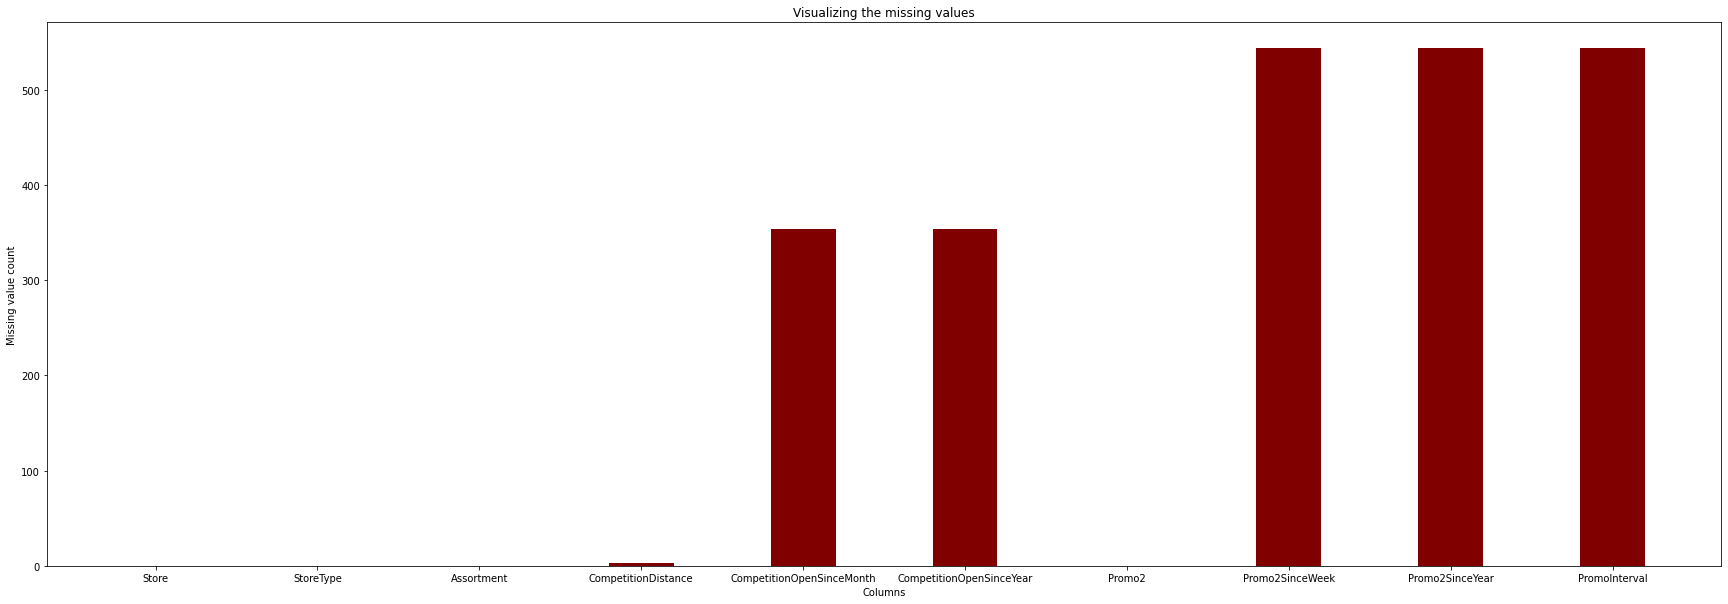

In [ ]:
# Visualizing the missing values 
courses = list(store.columns)
values = list(store.isnull().sum())
fig = plt.figure(figsize = (30, 10))
plt.bar(courses, values, color ='maroon',
        width = 0.4)
plt.xlabel("Columns")
plt.ylabel("Missing value count")
plt.title("Visualizing the missing values")
plt.show()

### What did you know about your dataset?

The **Rossmann Store Data** csv file has 1017209 rows and 9 columns. None of the variable in the dataset has missing/null values and most of the data is numerical type. The **store** data csv file has 1115 rows and 10 columns. Columns like CompetitionOpenSinceMonth, CompetitionOpenSinceYear, Promo2SinceWeek, Promo2SinceYear and PromoInterval has several missing values which we plotted in the above bar graph.             

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
RSD.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [ ]:
# Dataset Columns
store.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [ ]:
# Dataset Describe
RSD.describe(include = 'all')

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
count,1.017209e+06,1.017209e+06,1017209,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1017209,1.017209e+06
unique,NaN,NaN,942,NaN,NaN,NaN,NaN,5,NaN
top,NaN,NaN,2015-07-31,NaN,NaN,NaN,NaN,0,NaN
freq,NaN,NaN,1115,NaN,NaN,NaN,NaN,855087,NaN
mean,5.584297e+02,3.998341e+00,NaN,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,NaN,1.786467e-01
std,3.219087e+02,1.997391e+00,NaN,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,NaN,3.830564e-01
min,1.000000e+00,1.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00
25%,2.800000e+02,2.000000e+00,NaN,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,NaN,0.000000e+00
50%,5.580000e+02,4.000000e+00,NaN,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,NaN,0.000000e+00
75%,8.380000e+02,6.000000e+00,NaN,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,NaN,0.000000e+00


In [ ]:
# Dataset Describe
store.describe(include = 'all')

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
count,1115.00000,1115,1115,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000,571
unique,NaN,4,3,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,a,a,NaN,NaN,NaN,NaN,NaN,NaN,"Jan,Apr,Jul,Oct"
freq,NaN,602,593,NaN,NaN,NaN,NaN,NaN,NaN,335
mean,558.00000,NaN,NaN,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573,NaN
std,322.01708,NaN,NaN,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935,NaN
min,1.00000,NaN,NaN,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000,NaN
25%,279.50000,NaN,NaN,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000,NaN
50%,558.00000,NaN,NaN,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000,NaN
75%,836.50000,NaN,NaN,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000,NaN


### Variables Description 

**Data Description**

1. **Id** - an Id that represents a (Store, Date) duple within the test set
2. **Store** - a unique Id for each store
3. **Sales** - the turnover for any given day (this is what you are predicting)
4. **Customers** - the number of customers on a given day
5. **Open** - an indicator for whether the store was open: 0 = closed, 1 = open
6. **StateHoliday** - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
7. **SchoolHoliday** - indicates if the (Store, Date) was affected by the closure of public schools
8. **StoreType** - differentiates between 4 different store models: a, b, c, d
9. **Assortment** - describes an assortment level: a = basic, b = extra, c = extended
10. **CompetitionDistance** - distance in meters to the nearest competitor store
CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
11. **Promo** - indicates whether a store is running a promo on that day
12. **Promo2** - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
13. **Promo2Since**[Year/Week] - describes the year and calendar week when the store started participating in Promo2
14. **PromoInterval** - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

## 3. ***Data Wrangling***

### Data Wrangling Code

In [5]:
# Write your code to make your dataset analysis ready.
# Filling all null values with 0
store.fillna({'CompetitionOpenSinceMonth':0},inplace=True)
store.fillna({'CompetitionOpenSinceYear':0},inplace=True)
store.fillna({'Promo2SinceWeek':0},inplace=True)
store.fillna({'Promo2SinceYear':0},inplace=True)
store.fillna({'PromoInterval':0},inplace=True)

In [6]:
# Dropping unnecessary columns
store.drop(columns=['PromoInterval'],axis=1,inplace=True)

In [7]:
# Removing duplicates if any
RSD.duplicated().sum()
RSD.drop_duplicates(inplace=True)

store.duplicated().sum()
store.drop_duplicates(inplace=True)

In [8]:
# Create dummy variables for the catgeorical variable State
RSD['a'] = np.where(RSD['StateHoliday']=='a', 1, 0)
RSD['b'] = np.where(RSD['StateHoliday']=='b', 1, 0)
RSD['c'] = np.where(RSD['StateHoliday']=='c', 1, 0)

# Drop the original column State from the dataframe
RSD.drop(columns=['StateHoliday'],axis=1,inplace=True)

In [9]:
RSD = RSD.rename(columns={'a':"public holiday",'b':"Easter holiday", 'c':"Christmas holiday"})

In [10]:
# Final Rossmann Store Data set
RSD

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,public holiday,Easter holiday,Christmas holiday
0,1,5,2015-07-31,5263,555,1,1,1,0,0,0
1,2,5,2015-07-31,6064,625,1,1,1,0,0,0
2,3,5,2015-07-31,8314,821,1,1,1,0,0,0
3,4,5,2015-07-31,13995,1498,1,1,1,0,0,0
4,5,5,2015-07-31,4822,559,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,1,1,0,0
1017205,1112,2,2013-01-01,0,0,0,0,1,1,0,0
1017206,1113,2,2013-01-01,0,0,0,0,1,1,0,0
1017207,1114,2,2013-01-01,0,0,0,0,1,1,0,0


In [11]:
# Final store data set
store

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0
3,4,c,c,620.0,9.0,2009.0,0,0.0,0.0
4,5,a,a,29910.0,4.0,2015.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0
1111,1112,c,c,1880.0,4.0,2006.0,0,0.0,0.0
1112,1113,a,c,9260.0,0.0,0.0,0,0.0,0.0
1113,1114,a,c,870.0,0.0,0.0,0,0.0,0.0


### What all manipulations have you done and insights you found?

We filled all the missing values with zero and dropped the duplicates if any. StateHoliday column has categorical data so we changed it to numerical data.
We dropped a columns "PromoInterval" from the data set and now after few manipulations our data sets are ready for EDA.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

## ***EDA ON ROSSMANN STORE DATASET***

#### Chart - 1 - Sweet Viz

In [ ]:
# Chart - 1 visualization code
!pip install sweetviz
import sweetviz as sv
sweet_report = sv.analyze(RSD)
sweet_report.show_html('sweet_report_RSD.html')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 75.3 MB/s eta 0:00:00


                                             |          | [  0%]   00:00 -> (? left)

Report sweet_report_RSD.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


##### 1. Why did you pick the specific chart?

Sweetviz is an open-source Python library that generates beautiful, high-density visualizations to kickstart EDA (Exploratory Data Analysis) with just two lines of code. Output is a fully self-contained HTML application.
The system is built around quickly visualizing target values and comparing datasets. Its goal is to help quick analysis of target characteristics, training vs testing data, and other such data characterization tasks.

##### 2. What is/are the insight(s) found from the chart?

1. Sweet viz gives insights for all the columns in the dataset along with the visualisation of each coluns on a barplot. Its very easy to understand the dataset with the help of this library.

2. It directly gives insights like Values counts of each column of our dataset, Missing value counts of our dataset, Correlation, distribution of values, Barplot of each column, etc in a very simplified and organised way which helps to analysis dataset.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights will definitely create a positive impact on the business. The chart gives us very useful description about the dataset which can be helpful to boost the sales and business.

There are some insights which can slightly impact in a negative way but we always have the option to improve the things the leads to negative impact.

#### Chart - 2 - Barplot 

<AxesSubplot:title={'center':'Impact of promo on sales'}, xlabel='Promo', ylabel='Sales'>

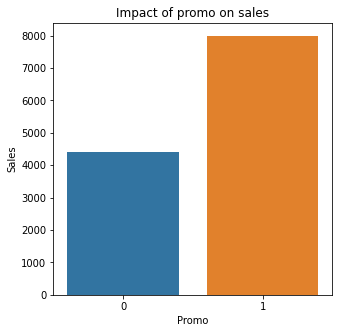

In [ ]:
# Chart - 2 visualization code
#Impact of promo on sales
plt.figure(figsize=(5,5))
plt.title("Impact of promo on sales")
Promo_sales = pd.DataFrame(RSD.groupby('Promo').agg({'Sales':'mean'}))
sns.barplot(x=Promo_sales.index, y = Promo_sales['Sales'])

##### 1. Why did you pick the specific chart?

Bar graph summarises the large set of data in simple visual form.
It displays each category of data in the frequency distribution.
It clarifies the trend of data better than the table.
It helps in estimating the key values at a glance.

##### 2. What is/are the insight(s) found from the chart?

1. The sales has a drastic impact when the promo is run on a particular day.

2. The sales is approximately doubled on the promo day.

3. It shows that promo is a way to boost the sales and grow the business. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insights have created positive impact on the business. We have analysed and understand the impact of promo on the sales and it will be helpful in the future growth of the business.

#### Chart - 3 - Barplot

In [ ]:
# Chart - 3 visualization code
numeric_features = RSD.describe().columns
numeric_features

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'SchoolHoliday', 'public holiday', 'Easter holiday',
       'Christmas holiday'],
      dtype='object')

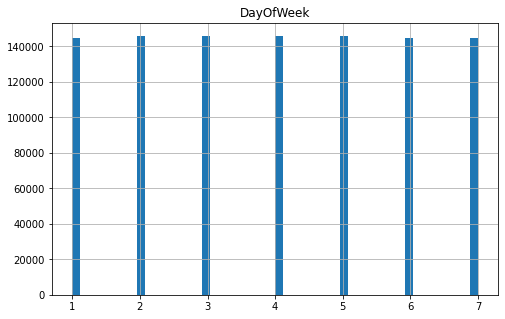

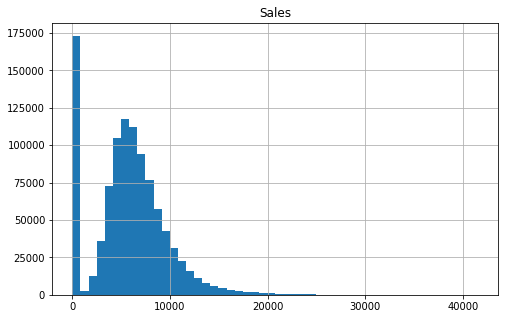

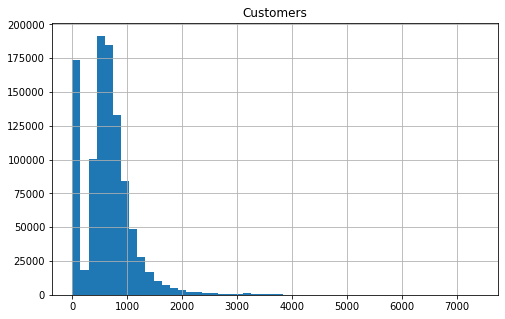

In [ ]:
for col in numeric_features[1:4]:
    fig = plt.figure(figsize=(8, 5))
    ax = fig.gca()
    feature = RSD[col]
    feature.hist(bins=50, ax = ax)    
    ax.set_title(col)
plt.show()

##### 1. Why did you pick the specific chart?

By plotting a histogram of a feature, we can see how the data is distributed, including its range, frequency, and shape. This can help us better understand the data and identify potential outliers or anomalies.

##### 2. What is/are the insight(s) found from the chart?

For the sales and customer columns we are able to understand the variation of counts in those columns. We are able to analyse the these features more precisely which may further have a positive impact on the business.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

It will definitely have positive impact because sales and customers are the key feature to analyse and boost the business and the above chart gives us the understanding of those features.

#### Chart - 4 - Pie Chart

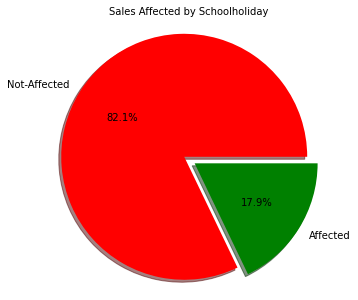

In [ ]:
# Chart - 4 visualization code
# Sales affected by School Holiday
labels = 'Not-Affected' , 'Affected'
sizes = RSD.SchoolHoliday.value_counts()
colors = ['red', 'green']
explode = (0.1, 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=360)
plt.axis('equal')
plt.title("Sales Affected by Schoolholiday",fontsize=10)
plt.plot()
fig=plt.gcf()
fig.set_size_inches(5,5)
plt.show()

##### 1. Why did you pick the specific chart?

Pie Chart displays relative proportions of multiple classes of data.
The size of the circle can be made proportional to the total quantity it represents. It summarize a large data set in visual form.

##### 2. What is/are the insight(s) found from the chart?

1. from the above chart we can say the only a small portion of sales is affected by the school holiday i.e., 17.9% whereas remaining 82.1% sales is unaffected by the school holiday.

2. Green colour in the pie chart is the portion of affected sales due to holiday. We can see that pie chart was the best plot to describe this trend as it shows the trend in very simple and easy way. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

It will definitely have positive impact because it gives us how sales is affected by the school holiday. It helps us to understand the incline and decline in the sales.

The insights gained from a pie chart can potentially help create a positive business impact such as Identifying sales trends, Understanding customer behavior, Analyzing marketing efforts, Comparing data across time periods, etc.

Overall, pie charts can be a useful visualization tool for presenting data in a clear and concise way. However, it is important to use them appropriately and to consider the limitations of the visualization method when analyzing data. A pie chart should be one of several methods used to analyze and present data in a comprehensive manner.

#### Chart - 5 - Pair Plot

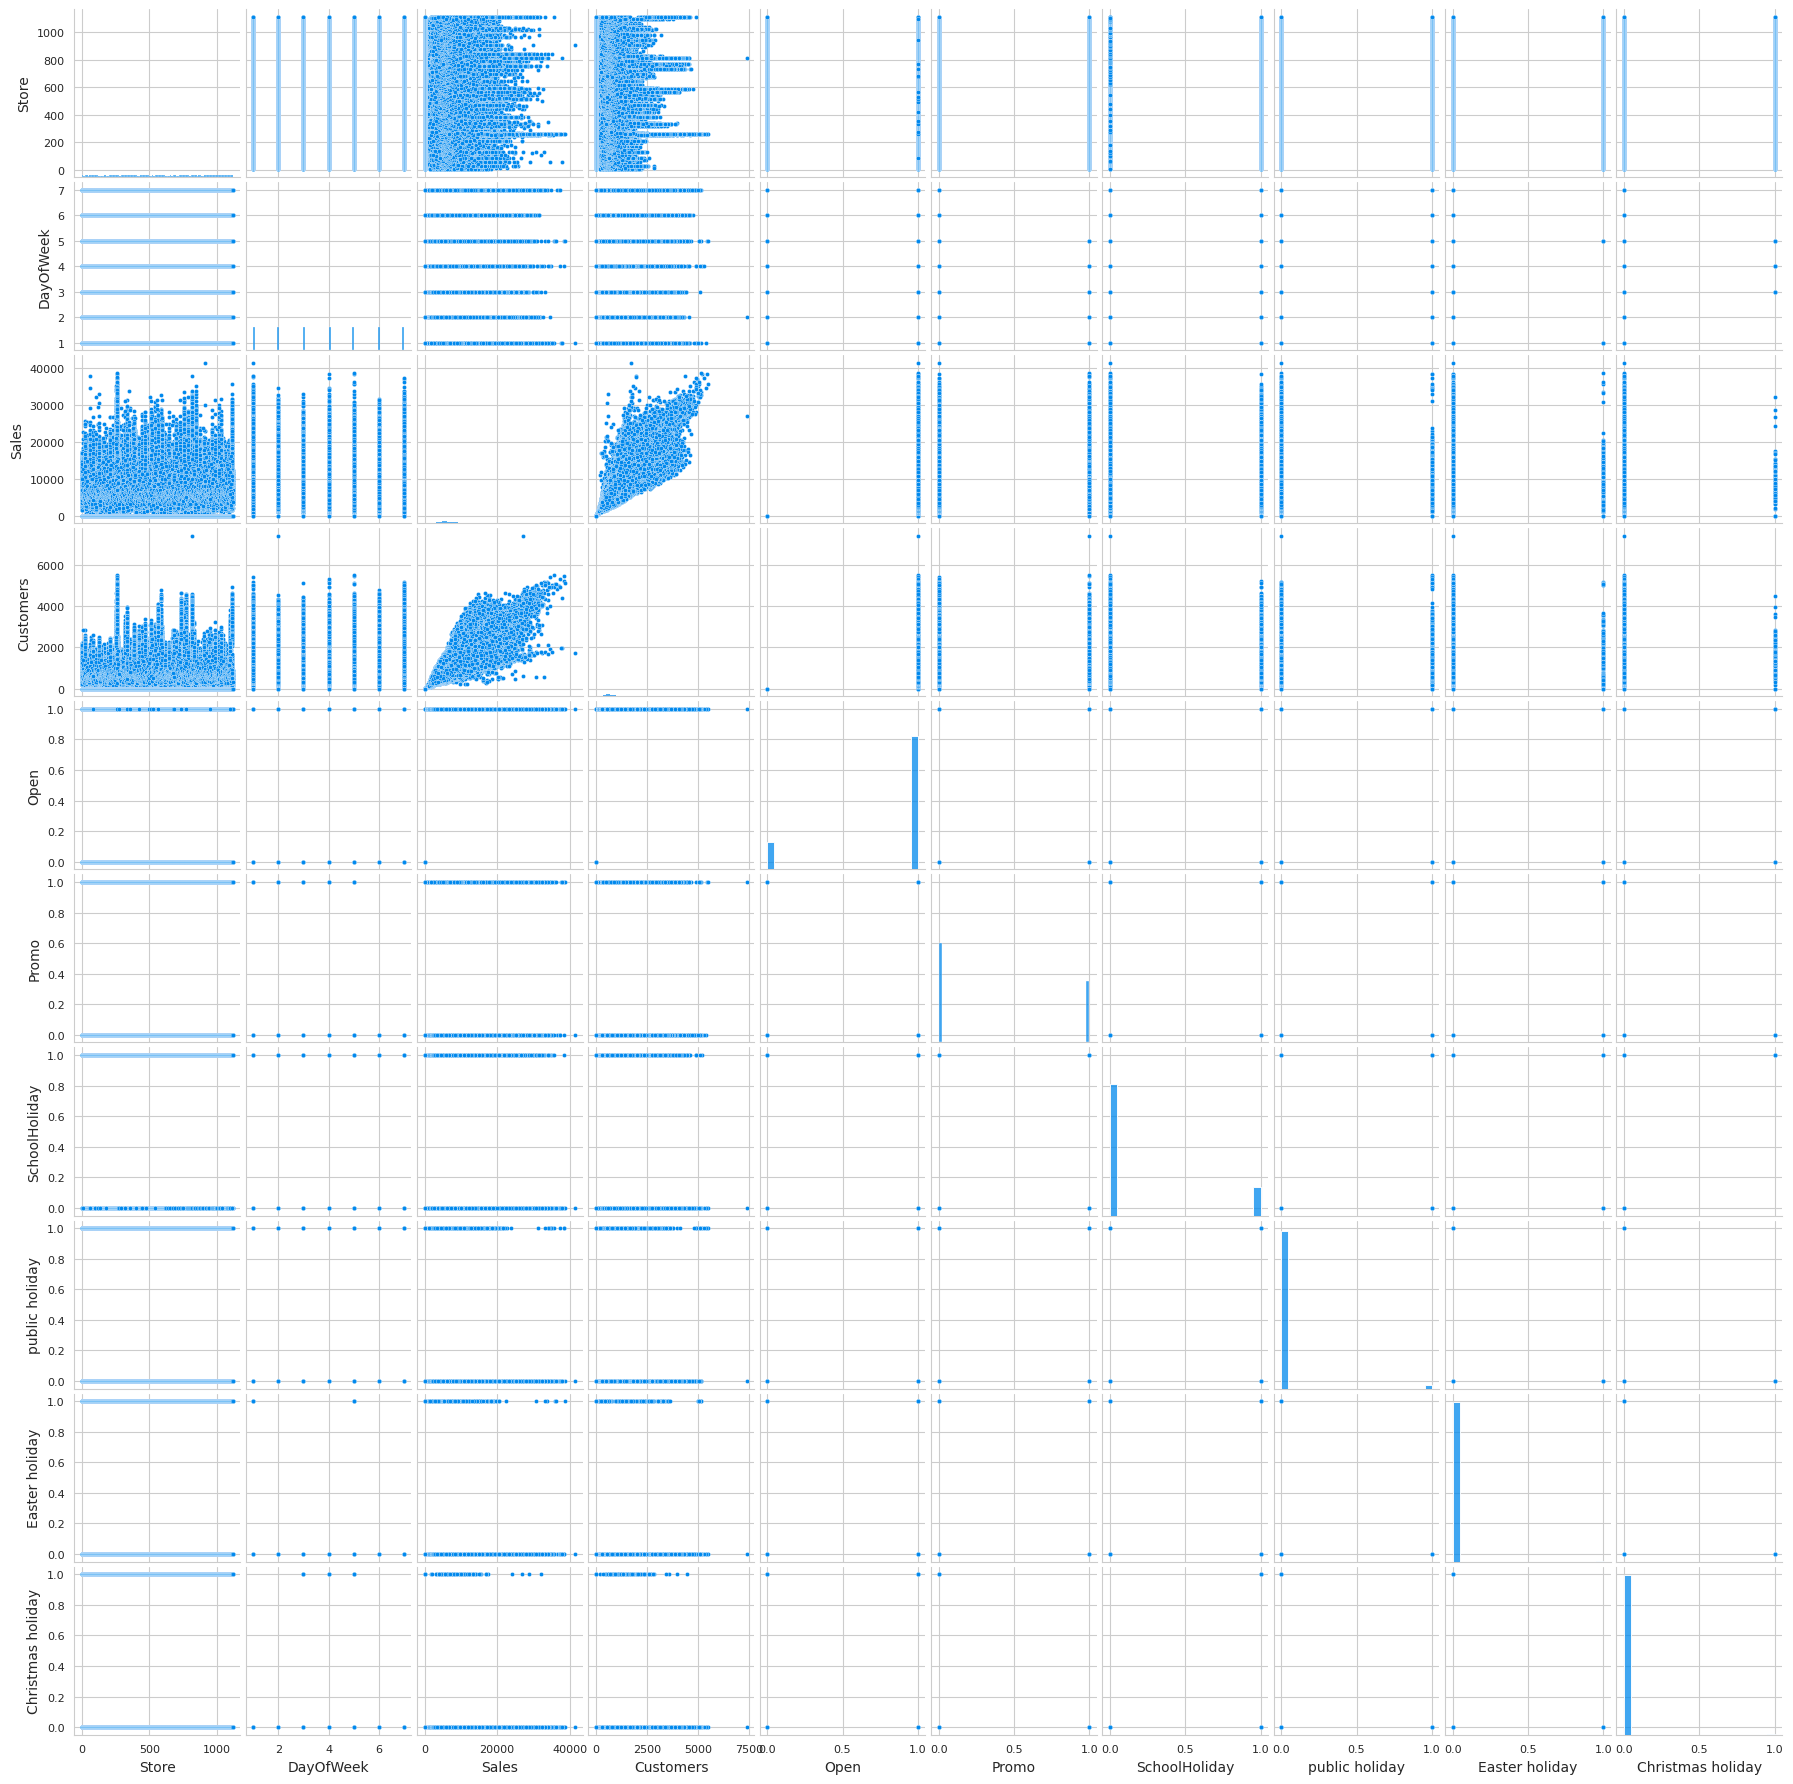

In [ ]:
# Chart - 5 visualization code
#pairplot for Rossmann store dataset
sns.set_style("whitegrid", {'axes.grid' : True})
pp=sns.pairplot(RSD,hue=None)
pp.fig.set_size_inches(18,18);

##### 1. Why did you pick the specific chart?

A Seaborn pairplot is a useful visualization tool that allows you to plot pairwise relationships across an entire dataframe (or a selected subset of columns) for numerical variables. It creates scatter plots for each pair of variables, histograms along the diagonal, and a visual representation of the Pearson correlation coefficient in the upper or lower triangle of the plot.

##### 2. What is/are the insight(s) found from the chart?

1. The scatter plots in the pairplot can help identify correlations between variables. If a strong positive or negative correlation exists between two variables, the scatter plot will show a pattern of points that are clustered around a straight line.

2. The histograms along the diagonal of the pairplot show the distribution of each variable. This can give insights into the shape of the data and whether it is normally distributed or skewed.

3. Outliers can be easily spotted on the scatter plots, especially when the data points are plotted against multiple variables.

4. Patterns of clustering or grouping can be identified in the scatter plots. These may indicate subgroups or clusters within the data that have distinct characteristics.

5. pairplot allows for the visualization of multiple dimensions of data at once, making it easier to identify patterns and relationships between variables.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights gained from a pairplot can help create a positive business impact in various ways such as Improved decision-making, Improved forecasting, Improved risk management, Improved customer segmentation, etc.

Overall, the insights gained from a pairplot can help businesses make data-driven decisions, optimize their operations, and create a positive impact on their bottom line.

#### Chart - 6 - Correlation Heatmap 

<AxesSubplot:>

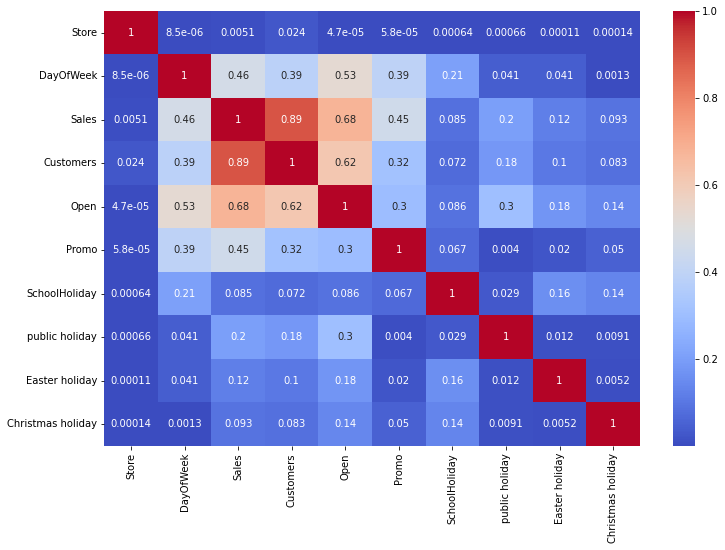

In [ ]:
# Correlation Heatmap visualization code
plt.figure(figsize=(12,8))
correlation = RSD.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

##### 1. Why did you pick the specific chart?

A correlation heatmap is a useful visualization tool that shows the correlation between variables in a dataset. Correlation heatmaps can be used to find potential relationships between variables and to understand the strength of these relationships. In addition, correlation plots can be used to identify outliers and to detect linear and nonlinear relationships.

##### 2. What is/are the insight(s) found from the chart?

1. The correlation heatmap provides a visual representation of the strength and direction of the correlation between variables. Positive correlations are shown in shades of red, while negative correlations are shown in shades of blue. A darker shade indicates a stronger correlation.

2. Correlation heatmaps can help identify multicollinearity, which is when two or more variables are highly correlated with each other. Multicollinearity can be problematic in predictive modeling because it can lead to overfitting and reduced model accuracy.

3. Correlation heatmaps can help with feature selection by identifying highly correlated variables that can be combined or eliminated. This can help reduce the number of variables in a model and improve model performance.

## ***EDA ON STORE DATASET***

#### Chart - 7 - Sweet Viz

In [ ]:
# Chart - 7 visualization code
!pip install sweetviz
import sweetviz as sv
sweet_report = sv.analyze(store)
sweet_report.show_html('sweet_report_store.html')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


                                             |          | [  0%]   00:00 -> (? left)

Report sweet_report_store.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


##### 1. Why did you pick the specific chart?

Sweetviz is an open-source Python library that generates beautiful, high-density visualizations to kickstart EDA (Exploratory Data Analysis) with just two lines of code. Output is a fully self-contained HTML application.
The system is built around quickly visualizing target values and comparing datasets. Its goal is to help quick analysis of target characteristics, training vs testing data, and other such data characterization tasks.

##### 2. What is/are the insight(s) found from the chart?

1. Sweet viz gives insights for all the columns in the dataset along with the visualisation of each coluns on a barplot. Its very easy to undrstand the dataset with the help of this library.

2. It directly gives insights like Values counts of each column of our dataset, Missing value counts of our dataset, Correlation, distribution of values, Barplot of each column, etc in a very simplified and organised way which helps to analysis dataset.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights will definitely create a positive impact on the business. The chart gives us very useful description about the dataset which can be helpful to boost the sales and business.

There are some insights which can slightly impact in a negative way but we always have the option to improve the things the leads to negative impact.

#### Chart - 8 - Barplot

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


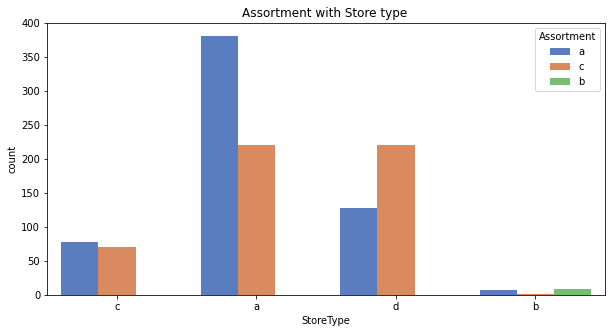

In [ ]:
# Chart - 8 visualization code
plt.figure(figsize=(10,5))
plt.title("Assortment with Store type ")
sns.countplot(store.StoreType,hue=store.Assortment, palette="muted")
plt.show()

##### 1. Why did you pick the specific chart?

Bar graph summarises the large set of data in simple visual form.
It displays each category of data in the frequency distribution.
It clarifies the trend of data better than the table.
It helps in estimating the key values at a glance.

##### 2. What is/are the insight(s) found from the chart?

1. Storetype 'a' has the most number of basic assortment followed by the storetype 'd' and then 'c'. Storetype 'b' has the least number of basic assortment.

2. only storetype 'b' has some assortment extra type other than that no storetype has it.

3. Storetype 'a' & 'd' has the highest count of extended assortment followed by 'c'. Soretype 'b' has almost negligible extended assortment (very less).

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights gained from a Seaborn countplot can help create a positive business impact in various ways such as Improved understanding of customer behavior, Improved marketing strategies, Improved resource allocation, Improved product design, etc.

Overall, the insights gained from a Seaborn countplot can help businesses make data-driven decisions, optimize their operations, and create a positive impact on their bottom line.

#### Chart - 9 - Pie Chart

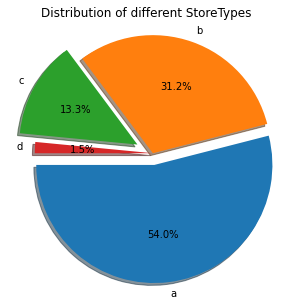

In [ ]:
# Chart - 9 visualization code
# Distribution Of Different Store Types
labels = 'a' , 'b' , 'c' , 'd'
sizes = store.StoreType.value_counts()
explode = (0.1, 0.0 , 0.15 , 0.0)
plt.pie(sizes, explode=explode, labels=labels, 
        autopct='%1.1f%%',shadow=True,  startangle=180)
plt.axis('equal')
plt.title("Distribution of different StoreTypes")
plt.plot()
fig=plt.gcf()
fig.set_size_inches(5,5)
plt.show()

##### 1. Why did you pick the specific chart?

A pie chart is a circular chart that is divided into slices to represent the relative proportions of different categories or values. It displays relative proportions of multiple classes of data. The size of the circle can be made proportional to the total quantity it represents.It summarize a large data set in visual form.



##### 2. What is/are the insight(s) found from the chart?

1. From the pie chart we can clearly see that storetype 'a' has the highest number of stores i.e. 54% which comprises of more than half of the stores.

2. Storetype 'b' has the second highest number of stores i.e. 31.2% which comprises of around one-third of all the stores.

3. Storetype 'c' becomes the 3rd highest storetype with 13.3% and storetype 'd' comprises of 1.5% which is the least of all.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from a pie chart can potentially help create a positive business impact such as Identifying sales trends, Understanding customer behavior, Analyzing marketing efforts, Comparing data across time periods, etc.

Overall, pie charts can be a useful visualization tool for presenting data in a clear and concise way. However, it is important to use them appropriately and to consider the limitations of the visualization method when analyzing data. A pie chart should be one of several methods used to analyze and present data in a comprehensive manner.

#### Chart - 10 - Pair Plot 

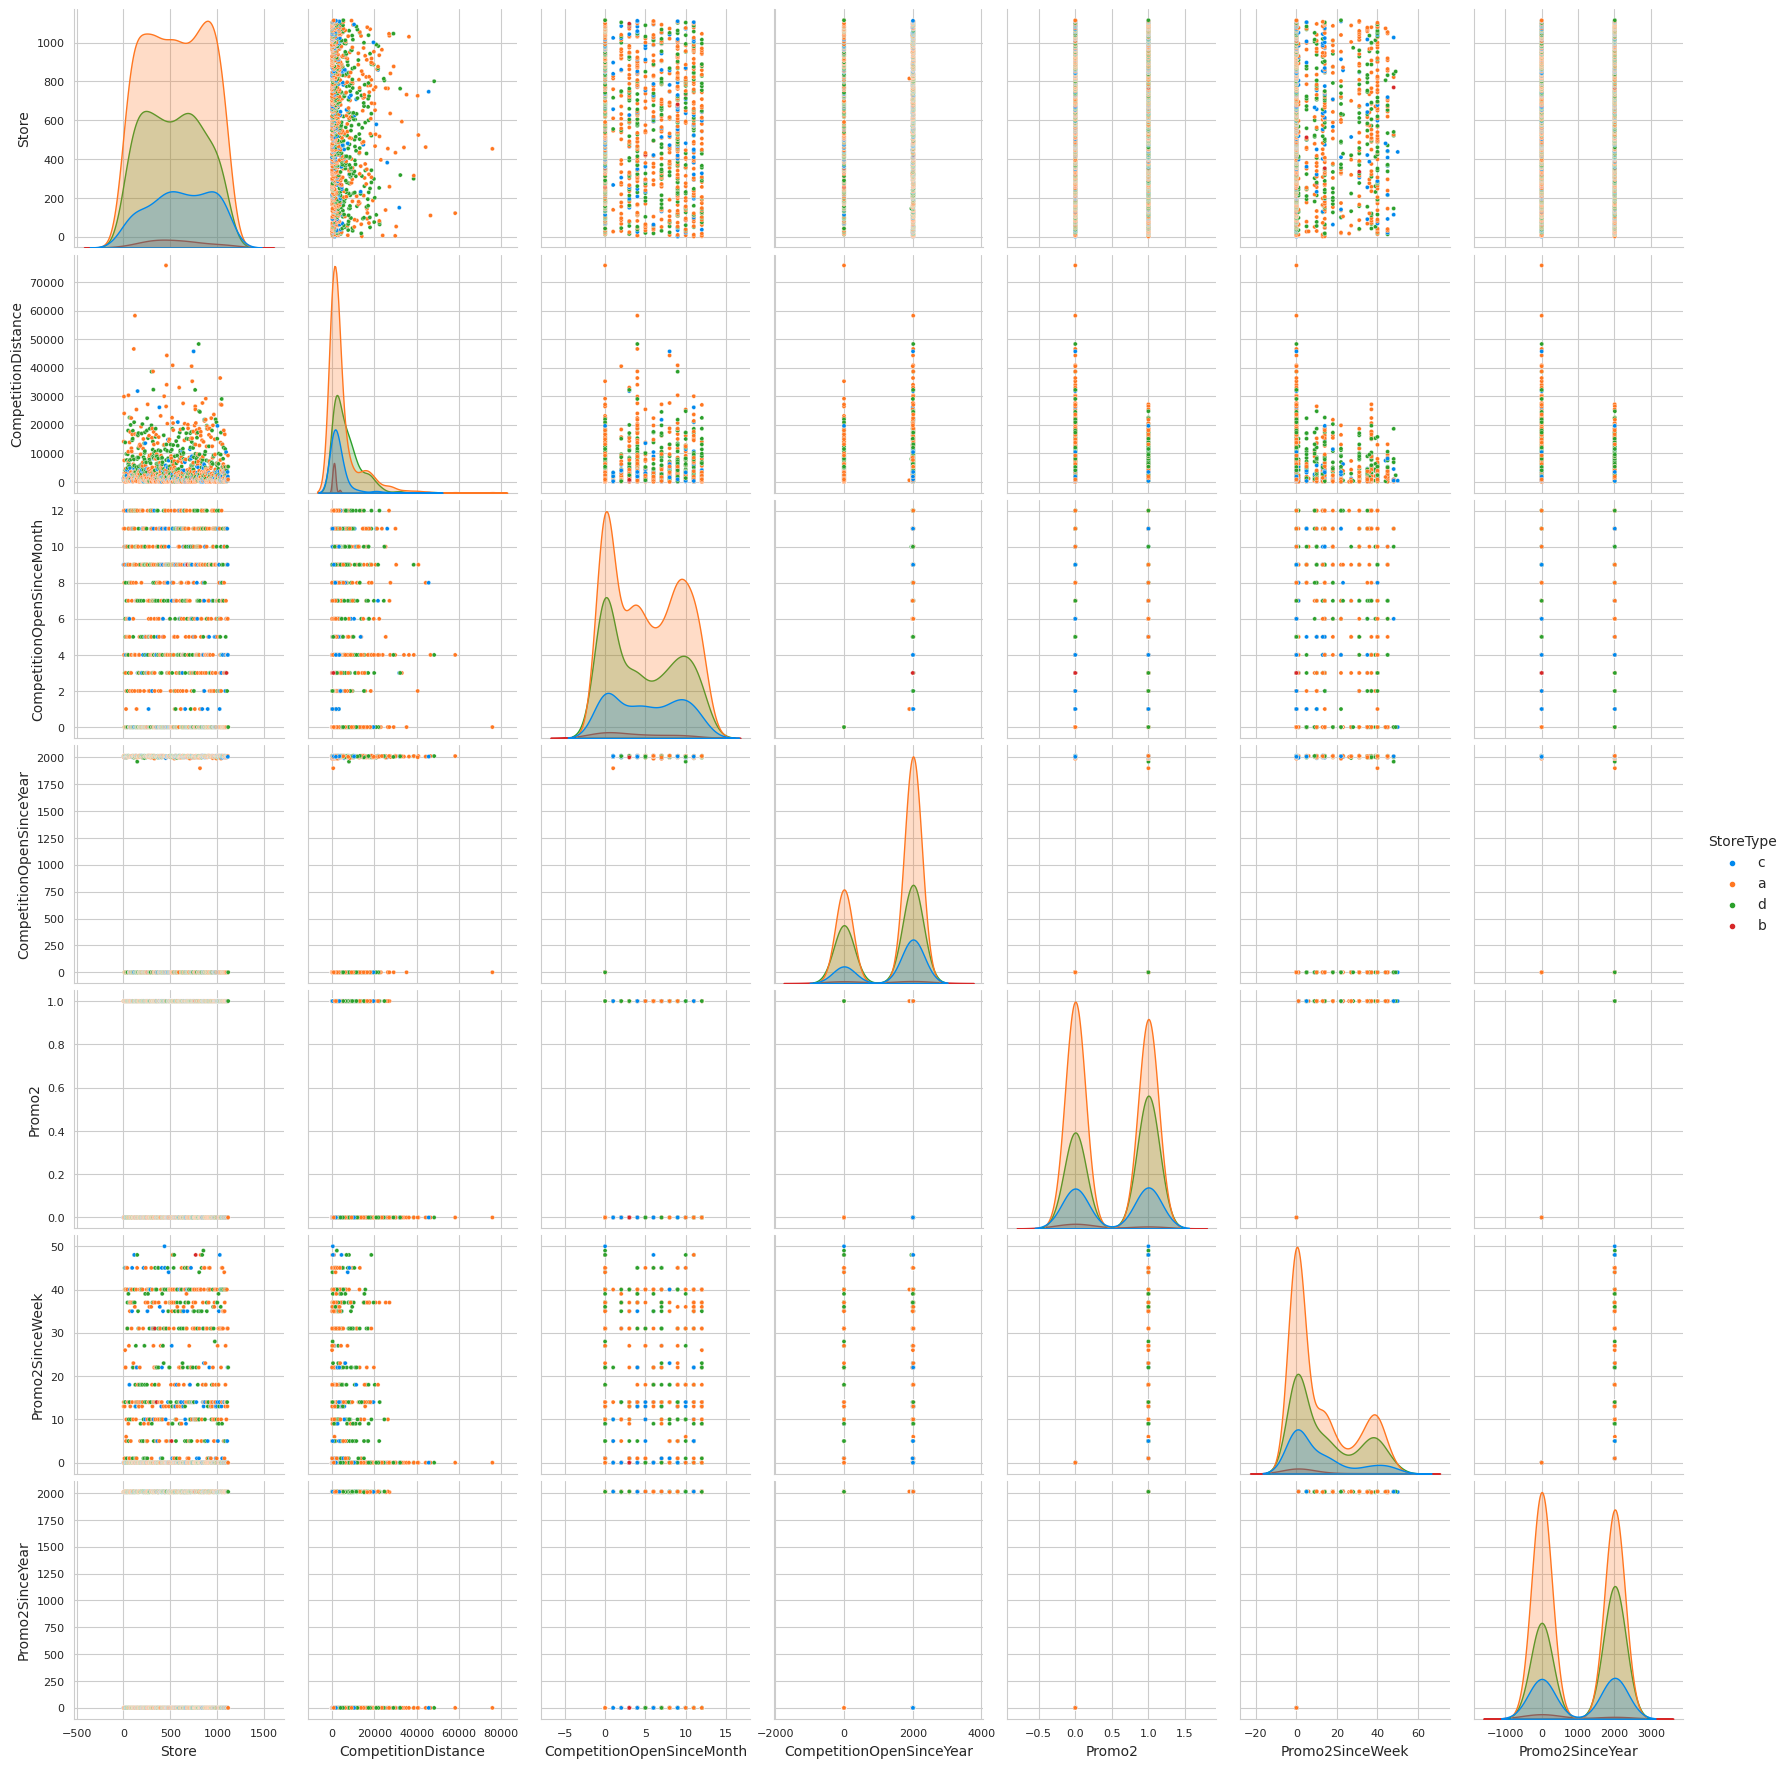

In [ ]:
# Chart - 10 visualization code
#pairplot for store dataset
sns.set_style("whitegrid", {'axes.grid' : True})
pp=sns.pairplot(store,hue='StoreType')
pp.fig.set_size_inches(18,18);

##### 1. Why did you pick the specific chart?

A Seaborn pairplot is a useful visualization tool that allows you to plot pairwise relationships across an entire dataframe (or a selected subset of columns) for numerical variables. It creates scatter plots for each pair of variables, histograms along the diagonal, and a visual representation of the Pearson correlation coefficient in the upper or lower triangle of the plot.

##### 2. What is/are the insight(s) found from the chart?

1. The scatter plots in the pairplot can help identify correlations between variables. If a strong positive or negative correlation exists between two variables, the scatter plot will show a pattern of points that are clustered around a straight line.

2. The histograms along the diagonal of the pairplot show the distribution of each variable. This can give insights into the shape of the data and whether it is normally distributed or skewed.

3. Outliers can be easily spotted on the scatter plots, especially when the data points are plotted against multiple variables.

4. Patterns of clustering or grouping can be identified in the scatter plots. These may indicate subgroups or clusters within the data that have distinct characteristics.

5. pairplot allows for the visualization of multiple dimensions of data at once, making it easier to identify patterns and relationships between variables.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights gained from a pairplot can help create a positive business impact in various ways such as Improved decision-making, Improved forecasting, Improved risk management, Improved customer segmentation, etc.

Overall, the insights gained from a pairplot can help businesses make data-driven decisions, optimize their operations, and create a positive impact on their bottom line.

#### Chart - 11 - Boxplot

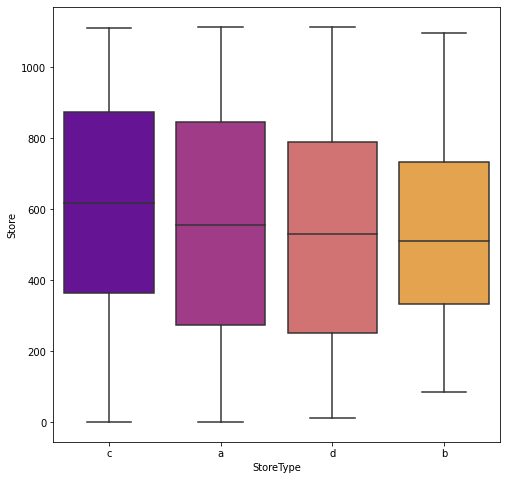

In [ ]:
# Chart - 11 visualization code
plt.figure(figsize=(8,8))
ax = sns.boxplot(data=store, y='Store',x='StoreType',palette='plasma')

##### 1. Why did you pick the specific chart?

A box plot, also known as a box and whisker plot, is a visualization tool that displays the distribution of a dataset through five summary statistics: minimum, first quartile, median, third quartile, and maximum. Box plots are very effective and easy to read, as they can summarize data from multiple sources and display the results in a single graph. Box plots allow for comparison of data from different categories for easier, more effective decision-making.

##### 2. What is/are the insight(s) found from the chart?

1. A Seaborn boxplot provides a visual representation of the distribution of a dataset. The box portion of the plot represents the middle 50% of the data, while the whiskers represent the remaining 50% of the data. We can see that the storetype 'a' has the widest box as compared to other storetypes. 

2. Storetype b has the smallest box which says that b type has the least number of stores.



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights gained from a boxplot can potentially help create a positive business impact. It can be useful in Product analysis, Pricing analysis, Marketing analysis, Performance analysis, etc.

Overall, boxplots can be a useful visualization tool for presenting data in a clear and concise way. By using boxplots to gain insights into business performance, businesses can make data-driven decisions that can help improve overall business outcomes.

#### Chart - 12 - Correlation Heatmap

<AxesSubplot:>

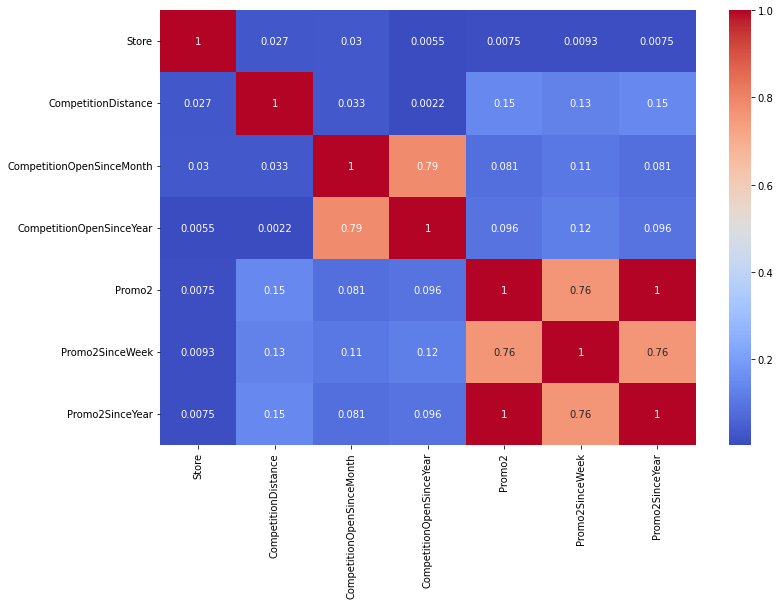

In [ ]:
# Correlation Heatmap visualization code
plt.figure(figsize=(12,8))
correlation = store.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

##### 1. Why did you pick the specific chart?

A correlation heatmap is a useful visualization tool that shows the correlation between variables in a dataset. Correlation heatmaps can be used to find potential relationships between variables and to understand the strength of these relationships. In addition, correlation plots can be used to identify outliers and to detect linear and nonlinear relationships.

##### 2. What is/are the insight(s) found from the chart?

1. The correlation heatmap provides a visual representation of the strength and direction of the correlation between variables. Positive correlations are shown in shades of red, while negative correlations are shown in shades of blue. A darker shade indicates a stronger correlation.

2. Correlation heatmaps can help identify multicollinearity, which is when two or more variables are highly correlated with each other. Multicollinearity can be problematic in predictive modeling because it can lead to overfitting and reduced model accuracy.

3. Correlation heatmaps can help with feature selection by identifying highly correlated variables that can be combined or eliminated. This can help reduce the number of variables in a model and improve model performance.

## ***5. Merging the two datasets***

### Merging two datasets is the process of bringing two datasets together into one, and aligning the rows from each based on common attributes or columns. We are provided with two datasets. We are now merging the two datastes for the further EDA and model implementation.

In [12]:
Merged_df = RSD.merge(store, on = "Store")


###  Handling Missing Values

In [13]:
# Missing Values/Null Values Count
Merged_df.isnull().sum()

Store                           0
DayOfWeek                       0
Date                            0
Sales                           0
Customers                       0
Open                            0
Promo                           0
SchoolHoliday                   0
public holiday                  0
Easter holiday                  0
Christmas holiday               0
StoreType                       0
Assortment                      0
CompetitionDistance          2642
CompetitionOpenSinceMonth       0
CompetitionOpenSinceYear        0
Promo2                          0
Promo2SinceWeek                 0
Promo2SinceYear                 0
dtype: int64

In [14]:
# Filling all null values with 0
Merged_df.fillna({'CompetitionDistance':0},inplace=True)

In [15]:
# Removing duplicates if any
Merged_df.duplicated().sum()
Merged_df.drop_duplicates(inplace=True)

In [16]:
# Merged Dataset View
Merged_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,public holiday,Easter holiday,Christmas holiday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
0,1,5,2015-07-31,5263,555,1,1,1,0,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0
1,1,4,2015-07-30,5020,546,1,1,1,0,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0
2,1,3,2015-07-29,4782,523,1,1,1,0,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0
3,1,2,2015-07-28,5011,560,1,1,1,0,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0
4,1,1,2015-07-27,6102,612,1,1,1,0,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0


In [17]:
# Dataset Rows & Columns count
Merged_df.shape

(1017209, 19)

## ***6. EDA on Merged Dataset***

### Chart 1: Correlation Heatmap of Merged dataset

<AxesSubplot:>

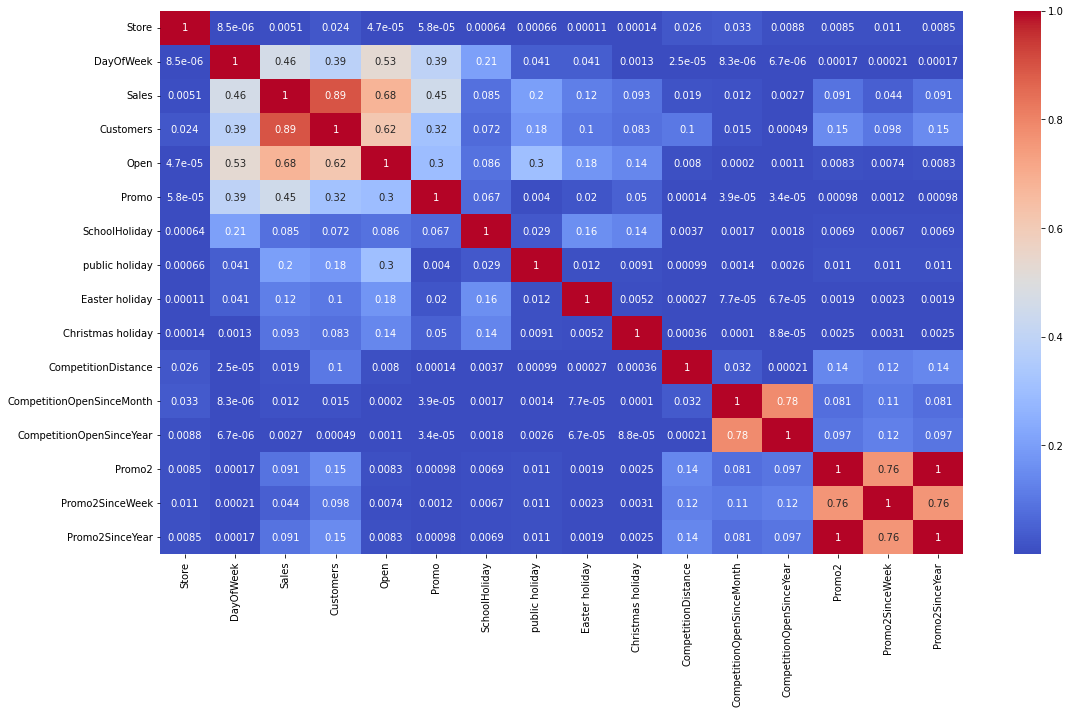

In [18]:
# Correlation Heatmap visualization code
plt.figure(figsize=(18,10))
correlation = Merged_df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

##### 1. Why did you pick the specific chart?

A correlation heatmap is a useful visualization tool that shows the correlation between variables in a dataset. Correlation heatmaps can be used to find potential relationships between variables and to understand the strength of these relationships. In addition, correlation plots can be used to identify outliers and to detect linear and nonlinear relationships.

##### 2. What is/are the insight(s) found from the chart?

1. The correlation heatmap provides a visual representation of the strength and direction of the correlation between variables. Positive correlations are shown in shades of red, while negative correlations are shown in shades of blue. A darker shade indicates a stronger correlation.

2. Correlation heatmaps can help identify multicollinearity, which is when two or more variables are highly correlated with each other. Multicollinearity can be problematic in predictive modeling because it can lead to overfitting and reduced model accuracy.

3. Correlation heatmaps can help with feature selection by identifying highly correlated variables that can be combined or eliminated. This can help reduce the number of variables in a model and improve model performance.

### Chart 2: Barplot

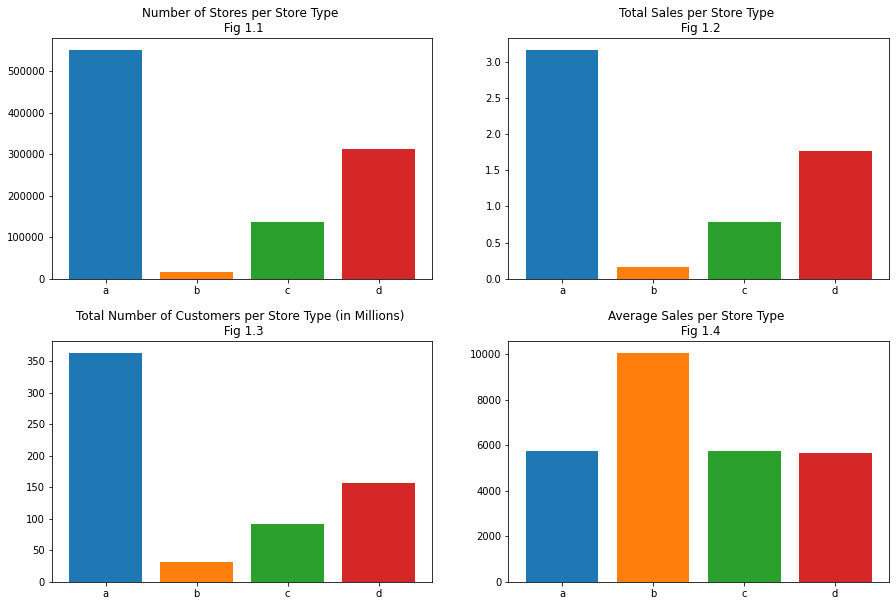

In [19]:
import itertools
fig, axes = plt.subplots(2, 2,figsize=(15,10) )
palette = itertools.cycle(sns.color_palette(n_colors=4))
plt.subplots_adjust(hspace = 0.26)
axes[0,0].bar(Merged_df.groupby(by="StoreType").count().Store.index ,Merged_df.groupby(by="StoreType").count().Store,color=[next(palette),next(palette),next(palette),next(palette)])
axes[0,0].set_title("Number of Stores per Store Type \n Fig 1.1")
axes[0,1].bar(Merged_df.groupby(by="StoreType").sum().Store.index,Merged_df.groupby(by="StoreType").sum().Sales/1e9,color=[next(palette),next(palette),next(palette),next(palette)])
axes[0,1].set_title("Total Sales per Store Type \n Fig 1.2")
axes[1,0].bar(Merged_df.groupby(by="StoreType").sum().Customers.index,Merged_df.groupby(by="StoreType").sum().Customers/1e6,color=[next(palette),next(palette),next(palette),next(palette)])
axes[1,0].set_title("Total Number of Customers per Store Type (in Millions) \n Fig 1.3")
axes[1,1].bar(Merged_df.groupby(by="StoreType").sum().Customers.index,Merged_df.groupby(by="StoreType").Sales.mean(),color=[next(palette),next(palette),next(palette),next(palette)])
axes[1,1].set_title("Average Sales per Store Type \n Fig 1.4")
plt.show()

##### 1. Why did you pick the specific chart?

##### 2. What is/are the insight(s) found from the chart?

Answer Here

### Chart 3:

In [20]:
# extract year, month, day and week of year from "Date"

Merged_df['Date']=pd.to_datetime(Merged_df['Date'])
Merged_df['Year'] = Merged_df['Date'].apply(lambda x: x.year)
Merged_df['Month'] = Merged_df['Date'].apply(lambda x: x.month)
Merged_df['Day'] = Merged_df['Date'].apply(lambda x: x.day)
Merged_df['WeekOfYear'] = Merged_df['Date'].apply(lambda x: x.weekofyear)

In [21]:
Merged_df.sort_values(by=['Date','Store'],inplace=True,ascending=[False,True])
Merged_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,public holiday,Easter holiday,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,Year,Month,Day,WeekOfYear
0,1,5,2015-07-31,5263,555,1,1,1,0,0,...,1270.0,9.0,2008.0,0,0.0,0.0,2015,7,31,31
942,2,5,2015-07-31,6064,625,1,1,1,0,0,...,570.0,11.0,2007.0,1,13.0,2010.0,2015,7,31,31
1884,3,5,2015-07-31,8314,821,1,1,1,0,0,...,14130.0,12.0,2006.0,1,14.0,2011.0,2015,7,31,31
2826,4,5,2015-07-31,13995,1498,1,1,1,0,0,...,620.0,9.0,2009.0,0,0.0,0.0,2015,7,31,31
3768,5,5,2015-07-31,4822,559,1,1,1,0,0,...,29910.0,4.0,2015.0,0,0.0,0.0,2015,7,31,31


/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


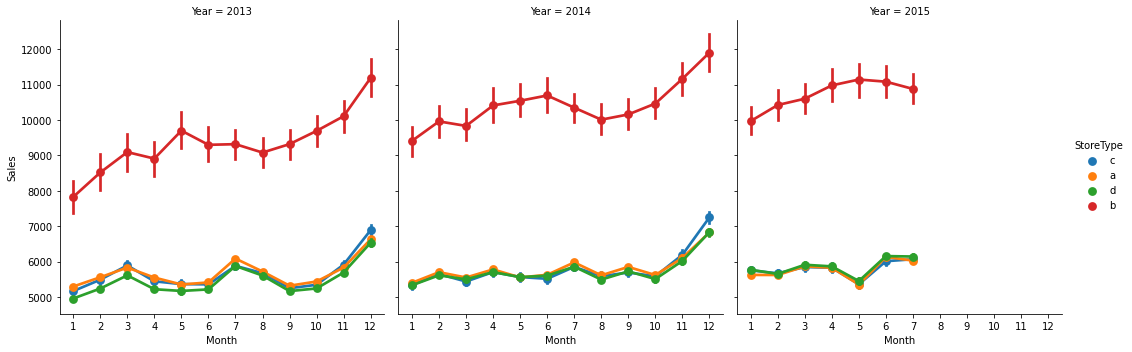

In [22]:
sns.factorplot(data = Merged_df, x = "Month", y = "Sales", col = "Year", hue = "StoreType")

##### 1. Why did you pick the specific chart?

##### 2. What is/are the insight(s) found from the chart?

Answer Here

### Chart 4:

/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


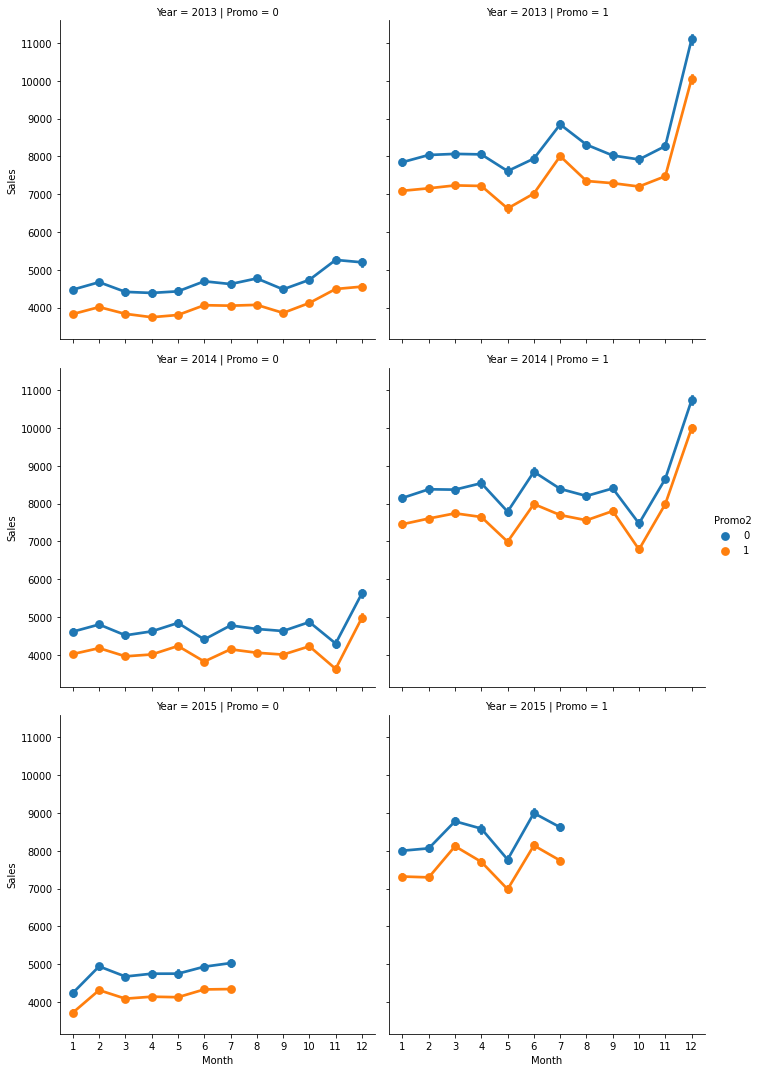

In [23]:

sns.factorplot(data = Merged_df, x ="Month", y = "Sales", 
               col = 'Promo', # per store type in cols
               hue = 'Promo2',
               row = "Year"
             )

##### 1. Why did you pick the specific chart?

##### 2. What is/are the insight(s) found from the chart?

Answer Here

### Chart 5:

Text(0.5, 1.0, 'Store Daily Open Countplot')

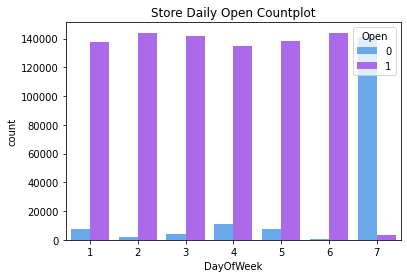

In [27]:
sns.countplot(x= 'DayOfWeek', hue='Open', data= Merged_df, palette='cool')
plt.title('Store Daily Open Countplot')

Text(0.5, 1.0, 'Store Daily Promo Countplot')

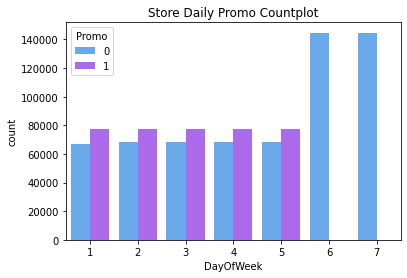

In [28]:
sns.countplot(x= 'DayOfWeek', hue='Promo', data= Merged_df, palette='cool')
plt.title('Store Daily Promo Countplot')

##### 1. Why did you pick the specific chart?

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Outliers

In [24]:
# Handling Outliers & Outlier treatments
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [25]:
# defining new variable after removing outliers
Merged_df= remove_outlier(Merged_df, 'Sales')

##### What all outlier treatment techniques have you used and why did you use those techniques?

Removing outliers using the Interquartile Range (IQR) method is the outlier treatment technique used here. This is the method used in the code snippet you provided. It involves calculating the IQR and using it to define a range within which data points are considered "normal", and any data points outside this range are considered outliers and removed.

### 3. Categorical Encoding

In [26]:
# Encode your categorical columns
# Create dummy variables for the catgeorical variable State of StoreType
Merged_df['StoreType-a'] = np.where(Merged_df['StoreType']=='a', 1, 0)
Merged_df['StoreType-b'] = np.where(Merged_df['StoreType']=='b', 1, 0)
Merged_df['StoreType-c'] = np.where(Merged_df['StoreType']=='c', 1, 0)
Merged_df['StoreType-d'] = np.where(Merged_df['StoreType']=='d', 1, 0)

# Drop the original column State from the dataframe
Merged_df.drop(columns=['StoreType'],axis=1,inplace=True)

<ipython-input-26-7988760e55e5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Merged_df['StoreType-a'] = np.where(Merged_df['StoreType']=='a', 1, 0)
<ipython-input-26-7988760e55e5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Merged_df['StoreType-b'] = np.where(Merged_df['StoreType']=='b', 1, 0)
<ipython-input-26-7988760e55e5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [27]:
# Create dummy variables for the catgeorical variable State of Assortment
Merged_df['Basic-Assortment'] = np.where(Merged_df['Assortment']=='a', 1, 0)
Merged_df['Extra-Assortment'] = np.where(Merged_df['Assortment']=='b', 1, 0)
Merged_df['Extended-Assortment'] = np.where(Merged_df['Assortment']=='c', 1, 0)

# Drop the original column State from the dataframe
Merged_df.drop(columns=['Assortment'],axis=1,inplace=True)

<ipython-input-27-6a712f27da8e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Merged_df['Basic-Assortment'] = np.where(Merged_df['Assortment']=='a', 1, 0)
<ipython-input-27-6a712f27da8e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Merged_df['Extra-Assortment'] = np.where(Merged_df['Assortment']=='b', 1, 0)
<ipython-input-27-6a712f27da8e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

In [28]:
Merged_df.shape

(990515, 28)

#### What all categorical encoding techniques have you used & why did you use those techniques?

We used One-Hot Encoding technique. This technique is used when there are nominal variables (variables with no order) that have a limited number of possible values. It creates a binary column for each possible value and assigns a value of 1 or 0 to each column depending on whether the value is present or not.

### 4. Dropping unwanted columns 


In [29]:
Merged_df.drop(columns=['Open','public holiday','Easter holiday','Christmas holiday','Date',],axis=1,inplace=True)
Merged_df.drop(columns=['CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Promo2','Promo2SinceWeek','Promo2SinceYear'],axis=1,inplace=True)

In [30]:
Merged_df.head()

,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday,CompetitionDistance,Year,Month,Day,WeekOfYear,StoreType-a,StoreType-b,StoreType-c,StoreType-d,Basic-Assortment,Extra-Assortment,Extended-Assortment
0,1,5,5263,555,1,1,1270.0,2015,7,31,31,0,0,1,0,1,0,0
942,2,5,6064,625,1,1,570.0,2015,7,31,31,1,0,0,0,1,0,0
1884,3,5,8314,821,1,1,14130.0,2015,7,31,31,1,0,0,0,1,0,0
2826,4,5,13995,1498,1,1,620.0,2015,7,31,31,0,0,1,0,0,0,1
3768,5,5,4822,559,1,1,29910.0,2015,7,31,31,1,0,0,0,1,0,0


In [31]:
# Removed all the 0 values in sales as it may affect the model
Merged_df = Merged_df[Merged_df['Sales']>0]

In [32]:
# Final Dataset For model implementation
Merged_df

,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday,CompetitionDistance,Year,Month,Day,WeekOfYear,StoreType-a,StoreType-b,StoreType-c,StoreType-d,Basic-Assortment,Extra-Assortment,Extended-Assortment
0,1,5,5263,555,1,1,1270.0,2015,7,31,31,0,0,1,0,1,0,0
942,2,5,6064,625,1,1,570.0,2015,7,31,31,1,0,0,0,1,0,0
1884,3,5,8314,821,1,1,14130.0,2015,7,31,31,1,0,0,0,1,0,0
2826,4,5,13995,1498,1,1,620.0,2015,7,31,31,0,0,1,0,0,0,1
3768,5,5,4822,559,1,1,29910.0,2015,7,31,31,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
621467,682,2,3375,566,0,1,150.0,2013,1,1,1,0,1,0,0,1,0,0
667669,733,2,10765,2377,0,1,860.0,2013,1,1,1,0,1,0,0,0,1,0
700661,769,2,5035,1248,0,1,840.0,2013,1,1,1,0,1,0,0,0,1,0
864127,948,2,4491,1039,0,1,1430.0,2013,1,1,1,0,1,0,0,0,1,0


## ***7. ML Model Implementation***

### *Splitting the data for training and testing*

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from math import sqrt
from sklearn.metrics import mean_squared_error

# Splitting our data into train and test
X=Merged_df.drop('Sales',axis=1)
y=Merged_df['Sales']
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardization
sc= StandardScaler()
X_train_std= sc.fit_transform(Xtrain)
X_test_std= sc.transform(Xtest)

### ML Model - 1 - Linear Regression

In [34]:
# ML Model - 1 Implementation
lr=LinearRegression()

# Fit the Algorithm
lr.fit(Xtrain,ytrain)
print("Training R2")
print(lr.score(Xtrain,ytrain))
print("Testing R2")
print(lr.score(Xtest,ytest))

# Predict on the model
predicted = lr.predict(Xtest)
print(lr.coef_)
print(lr.intercept_)

Training R2
0.7805289221990215
Testing R2
0.7800758429619601
[-1.07132788e-01 -2.37202787e+01  7.10662504e+00  1.10275737e+03
  2.90234169e+01  2.01868402e-02  1.63838438e+02  4.47036624e+01
  1.06980061e+00 -3.76827340e+00  3.25395631e+02 -1.94892142e+03
  1.87290364e+02  1.43623543e+03  1.36319962e+03 -3.02271306e+03
  1.65951343e+03]
-331179.4066113355


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [35]:
# Visualizing evaluation Metric Score chart
y_pred_train = lr.predict(Xtrain)
y_pred = lr.predict(Xtest)

In [36]:
print("Predicted sales: ", y_pred)

Predicted sales:  [6031.33969261 3909.49682445 3987.58653634 ... 5759.64151222 7706.14451829
 6857.88274854]


In [37]:
# Evaluate the model using mean squared error and R-squared
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(ytest, y_pred)
r2 = r2_score(ytest, y_pred)
print("Mean squared error: ", mse)
print("R-squared: ", r2)

Mean squared error:  1335245.578809684
R-squared:  0.7800758429619601


In [38]:
math.sqrt(mean_squared_error(ytest, y_pred))

1155.5282682867105

In [39]:
Train_Score_1 = lr.score(Xtrain,ytrain)
Train_Score_1

0.7805289221990215

In [40]:
Test_Score_1=lr.score(Xtest,ytest)
Test_Score_1

0.7800758429619601

In [41]:
#storing 200 observations for analysis
simple_lr_pred = y_pred[:200]
simple_lr_real = ytest[:200]

#storing these values into dataframe
dataset_lr = pd.DataFrame({'Real':simple_lr_real,'PredictedLR':simple_lr_pred})

In [42]:
#storing absolute diffrences between actual sales price and predicted
dataset_lr['diff']=(dataset_lr['Real']-dataset_lr['PredictedLR']).abs()

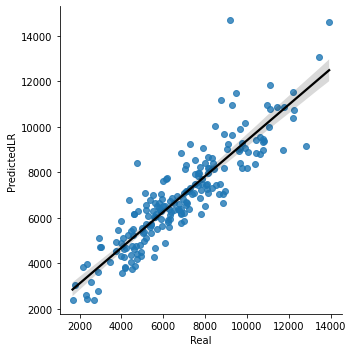

In [43]:
#visualising our predictions
sns.lmplot(x='Real', y='PredictedLR', data=dataset_lr, line_kws={'color': 'black'});

#### 2. Cross- Validation & Hyperparameter Tuning
Ordinary Least Square Method 

In [44]:
# let's add an intercept (beta_0) to our model
import statsmodels.api as sm
X = sm.add_constant(X)

# sm.OLS(output, input)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                 1.937e+05
Date:                Thu, 09 Mar 2023   Prob (F-statistic):               0.00
Time:                        12:41:37   Log-Likelihood:            -6.9273e+06
No. Observations:              817644   AIC:                         1.385e+07
Df Residuals:                  817628   BIC:                         1.385e+07
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -2.11e+05   2172.738    -97.119      0.000   -2.15e+05   -2.07e+05
Store                  -0.1088      0.004    -27.389      0.000      -0.117      -0.101
DayOfWeek             -22.7944      0.787    -28.980      0.000     -24.336     -21.253
Customers               7.1077      0.005   1476.262      0.000       7.098       7.117
Promo                1100.9496      2.772    397.206      0.000    1095.517    1106.382
SchoolHoliday          27.7698      3.333      8.333      0.000      21.238      34.302
CompetitionDistance     0.0202      0.000    120.095      0.000       0.020       0.021
Year                  165.2848      1.708     96.770      0.000     161.937     168.632
Month                  44.3351      1.440     30.778      0.000      41.512      47.158
Day                     1.0690      0.152      7.030      0.000       0.771       1.367
WeekOfYear             -3.7264      0.331    -11.274      0.000      -4.374      -3.079
StoreType-a         -5.243e+04    543.189    -96.525      0.000   -5.35e+04   -5.14e+04
StoreType-b          -5.47e+04    543.378   -100.661      0.000   -5.58e+04   -5.36e+04
StoreType-c         -5.257e+04    543.203    -96.774      0.000   -5.36e+04   -5.15e+04
StoreType-d         -5.132e+04    543.181    -94.479      0.000   -5.24e+04   -5.03e+04
Basic-Assortment    -6.896e+04    724.308    -95.208      0.000   -7.04e+04   -6.75e+04
Extra-Assortment    -7.339e+04    724.325   -101.324      0.000   -7.48e+04    -7.2e+04
Extended-Assortment -6.866e+04    724.321    -94.798      0.000   -7.01e+04   -6.72e+04
==============================================================================
Omnibus:                    49465.193   Durbin-Watson:                   1.725
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           128577.713
Skew:                           0.349   Prob(JB):                         0.00
Kurtosis:                       4.813   Cond. No.                     5.81e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.26e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

##### Which hyperparameter optimization technique have you used and why?

We used ordinary least square method optimization technique beacuse the aim of the ordinary least squares method is to minimize the prediction error, between the predicted and real values. We choose to minimize the sum of squared errors instead of the sum of errors directly. It takes into account the sum of squared errors instead of the errors as they are because sometimes they can be negative or positive and they could sum up to a nearly null value.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

# ***ML Model - 2 - Decision Tree Regression***

In [45]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# ML Model - 2 Implementation
tree_model = DecisionTreeRegressor(random_state=42)

# Fit the Algorithm
DT_reg = tree_model.fit(Xtrain, ytrain)

# Predict the model
y_pred_dt_test = tree_model.predict(Xtest)
y_pred_dt_train = tree_model.predict(Xtrain)

In [46]:
train_score_1 = DT_reg.score(Xtrain, ytrain)
test_score_1 = DT_reg.score(Xtest, ytest)

print("Regresion Model Score" , ":" , train_score_1)
print("Test Score" ,":" , test_score_1)

Regresion Model Score : 1.0
Test Score : 0.9304303102788827


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [47]:
def rmse(x, y):
    return sqrt(mean_squared_error(x, y))

# definte MAPE function
def mape(x, y): 
    return np.mean(np.abs((x - y) / x)) * 100


In [48]:
print("Training RMSE", ":", rmse(ytrain, y_pred_dt_train),
      "Testing RMSE", ":", rmse(ytest, y_pred_dt_test))
print("Training MAPE", ":", mape(ytrain, y_pred_dt_train),
      "Testing MAPE", ":", mape(ytest, y_pred_dt_test))

Training RMSE : 0.0 Testing RMSE : 649.9113769424871
Training MAPE : 0.0 Testing MAPE : 6.995589304673004


#### 2. Cross- Validation & Hyperparameter Tuning

In [49]:
# ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
params = {'max_depth': [3, 5, 7, 9],
          'min_samples_leaf': [1, 3, 5, 7],
          'min_samples_split': [2, 4, 6, 8]}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=tree_model, param_grid=params, cv=5, n_jobs=-1)
grid_search.fit(Xtrain, ytrain)

# Print the best hyperparameters and corresponding score
print('Best hyperparameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)


Best hyperparameters: {'max_depth': 9, 'min_samples_leaf': 3, 'min_samples_split': 2}
Best score: 0.8338746051135297


In [50]:
# Use the best hyperparameters to fit the model and make predictions
best_tree_model = grid_search.best_estimator_
DT_reg_new = best_tree_model.fit(Xtrain, ytrain)

# Predict new best tree model
y_pred_new_test = best_tree_model.predict(Xtest)
y_pred_new_train = best_tree_model.predict(Xtrain)

In [51]:
train_score_2 = DT_reg_new.score(Xtrain, ytrain)
test_score_2 = DT_reg_new.score(Xtest, ytest)

print("Regresion Model Score" , ":" , train_score_2)
print("Test Score" ,":" , test_score_2)

Regresion Model Score : 0.8362682971829807
Test Score : 0.8327871988676445


In [52]:
print("Training RMSE", ":", rmse(ytrain, y_pred_new_train),
      "Testing RMSE", ":", rmse(ytest, y_pred_new_test))
print("Training MAPE", ":", mape(ytrain, y_pred_new_train),
      "Testing MAPE", ":", mape(ytest, y_pred_new_test))

Training RMSE : 999.4602222729641 Testing RMSE : 1007.578443355826
Training MAPE : 12.022373663051852 Testing MAPE : 12.111607912854119


In [53]:
#storing 200 observations for analysis
New_pred_model = y_pred_new_test[:200]
New_real_Model = ytest[:200]

#storing these values into dataframe
dataset_dt_New = pd.DataFrame({'Real':New_real_Model,'PredictedDT_New':New_pred_model})

In [54]:
#storing absolute diffrences between actual sales price and predicted
dataset_dt_New['diff']=(dataset_dt_New['Real']-dataset_dt_New['PredictedDT_New']).abs()

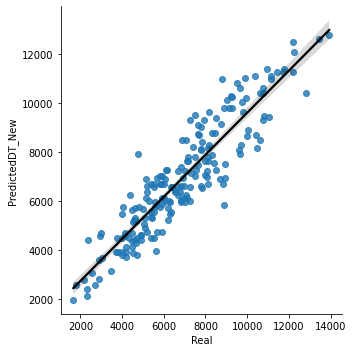

In [55]:
#visualising our predictions
sns.lmplot(x='Real', y='PredictedDT_New', data=dataset_dt_New, line_kws={'color': 'black'});

##### Which hyperparameter optimization technique have you used and why?

We have used GridSearchCV hyperparameter technique to find the best combination of hyperparameters for the given machine learning model. We used GridSearchCV because it is a hyperparameter optimization technique that involves systematically searching through a predefined hyperparameter space to find the best combination of hyperparameters that result in the highest performance metric. It works by defining a grid of hyperparameter values to try, and then evaluates the model performance for each combination of hyperparameters in the grid. The hyperparameter values that result in the highest performance metric are then selected as the optimal hyperparameters.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

# ***ML Model - 3 - Random Forest Regression***

In [56]:
from sklearn.ensemble import RandomForestRegressor

# ML Model - 3 Implementation
rf = RandomForestRegressor(max_depth= 9, min_samples_leaf = 3, min_samples_split= 2)

# Fit the Algorithm
rdf_reg = rf.fit(Xtrain, ytrain)

# Predict on the model
y_pred_rf_test = rf.predict(Xtest)
y_pred_rf_train = rf.predict(Xtrain)

In [57]:
train_score_3 =rdf_reg.score(Xtrain, ytrain)
test_score_3 =rdf_reg.score(Xtest, ytest)

print("Regresion Model Score" , ":" , train_score_3)
print("Test Score" ,":" , test_score_3)   

Regresion Model Score : 0.8449310271726951
Test Score : 0.8419254144168964


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [58]:
print("Training RMSE", ":", rmse(ytrain, y_pred_rf_train),
      "Testing RMSE", ":", rmse(ytest, y_pred_rf_test))
print("Training MAPE", ":", mape(ytrain, y_pred_rf_train),
      "Testing MAPE", ":", mape(ytest, y_pred_rf_test))

Training RMSE : 972.6611732509564 Testing RMSE : 979.6594503100926
Training MAPE : 11.724823890103071 Testing MAPE : 11.806340793122782


In [59]:
#storing 200 observations for analysis
rf_pred_model = y_pred_rf_test[:200]
rf_real_Model = ytest[:200]

#storing these values into dataframe
dataset_rf = pd.DataFrame({'Real':rf_real_Model,'Predicted_RF':rf_pred_model})

In [60]:
#storing absolute diffrences between actual sales price and predicted
dataset_rf['diff']=(dataset_rf['Real']-dataset_rf['Predicted_RF']).abs()

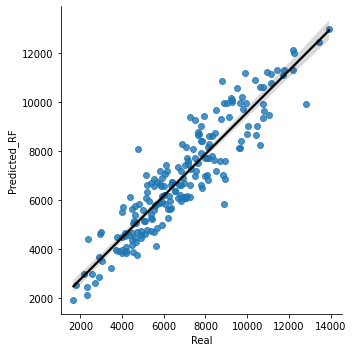

In [61]:
#visualising our predictions
sns.lmplot(x='Real', y='Predicted_RF', data=dataset_rf, line_kws={'color': 'black'});

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

We used RMSE(Root Mean Squae Error) and MAPE(Mean Absolute Percentage Error) in our models for regression. It can be consider for a positive business impact because it can be used to measure the accuracy of a machine learning model, and they can be valuable in helping to improve the performance of the model. However, their suitability for measuring business impact depends on the specific business problem and the objectives of the stakeholders.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

We choose Random Forest from the above created model as our final prediction model because Random forest has given us the best fit model with the training score of 0.8449310271726951 and testing score of 0.8419254144168964. There is no overfitting both the scores are almost same and with the best accuracy among all the models.  

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***